**[Intermediate Machine Learning Home Page](https://www.kaggle.com/learn/intermediate-machine-learning)**

---


In this exercise, you will use your new knowledge to train a model with **gradient boosting**.

# Setup

The questions below will give you feedback on your work. Run the following cell to set up the feedback system.

In [1]:
# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.ml_intermediate.ex6 import *
print("Setup Complete")

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:03:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Setup Complete


You will work with the [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course) dataset from the previous exercise. 

![Ames Housing dataset image](https://i.imgur.com/lTJVG4e.png)

Run the next code cell without changes to load the training and validation sets in `X_train`, `X_valid`, `y_train`, and `y_valid`.  The test set is loaded in `X_test`.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X = pd.read_csv('../input/train.csv', index_col='Id')
X_test_full = pd.read_csv('../input/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice              
X.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

# Step 1: Build model

In this step, you'll build and train your first model with gradient boosting.

- Begin by setting `my_model_1` to an XGBoost model.  Use the [XGBRegressor](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor) class, and set the random seed to 0 (`random_state=0`).  **Leave all other parameters as default.**
- Then, fit the model to the training data in `X_train` and `y_train`.

In [3]:
from xgboost import XGBRegressor

# Define the model
my_model_1 = XGBRegressor(random_state=0) # Your code here

# Fit the model
my_model_1.fit(X_train, y_train) # Your code here

# Check your answer
step_1.a.check()

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:03:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [4]:
# Lines below will give you a hint or solution code
#step_1.a.hint()
# step_1.a.solution()

Set `predictions_1` to the model's predictions for the validation data.  Recall that the validation features are stored in `X_valid`.

In [5]:
from sklearn.metrics import mean_absolute_error

# Get predictions
predictions_1 = my_model_1.predict(X_valid) # Your code here

# Check your answer
step_1.b.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [6]:
# Lines below will give you a hint or solution code
#step_1.b.hint()
# step_1.b.solution()

Finally, use the `mean_absolute_error()` function to calculate the mean absolute error (MAE) corresponding to the predictions for the validation set.  Recall that the labels for the validation data are stored in `y_valid`.

In [7]:
# Calculate MAE
mae_1 = mean_absolute_error(y_true=y_valid, y_pred=predictions_1) # Your code here

# Uncomment to print MAE
print("Mean Absolute Error:" , mae_1)

# Check your answer
step_1.c.check()

Mean Absolute Error: 16803.434690710616


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [8]:
# Lines below will give you a hint or solution code
#step_1.c.hint()
#step_1.c.solution()

# Step 2: Improve the model

Now that you've trained a default model as baseline, it's time to tinker with the parameters, to see if you can get better performance!
- Begin by setting `my_model_2` to an XGBoost model, using the [XGBRegressor](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor) class.  Use what you learned in the previous tutorial to figure out how to change the default parameters (like `n_estimators` and `learning_rate`) to get better results.
- Then, fit the model to the training data in `X_train` and `y_train`.
- Set `predictions_2` to the model's predictions for the validation data.  Recall that the validation features are stored in `X_valid`.
- Finally, use the `mean_absolute_error()` function to calculate the mean absolute error (MAE) corresponding to the predictions on the validation set.  Recall that the labels for the validation data are stored in `y_valid`.

In order for this step to be marked correct, your model in `my_model_2` must attain lower MAE than the model in `my_model_1`. 

In [9]:
# Define the model
my_model_2 = XGBRegressor(n_estimators=500, learning_rate=0.1) # Your code here

# Fit the model
my_model_2.fit(X_train, y_train) # Your code here

# Get predictions
predictions_2 = my_model_2.predict(X_valid) # Your code here

# Calculate MAE
mae_2 = mean_absolute_error(y_pred=predictions_2, y_true=y_valid) # Your code here

# Uncomment to print MAE
print("Mean Absolute Error:" , mae_2)

# Check your answer
step_2.check()

[05:03:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Mean Absolute Error: 15920.257852632705


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [10]:
# Lines below will give you a hint or solution code
#step_2.hint()
# step_2.solution()

# Step 3: Break the model

In this step, you will create a model that performs worse than the original model in Step 1.  This will help you to develop your intuition for how to set parameters.  You might even find that you accidentally get better performance, which is ultimately a nice problem to have and a valuable learning experience!
- Begin by setting `my_model_3` to an XGBoost model, using the [XGBRegressor](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor) class.  Use what you learned in the previous tutorial to figure out how to change the default parameters (like `n_estimators` and `learning_rate`) to design a model to get high MAE.
- Then, fit the model to the training data in `X_train` and `y_train`.
- Set `predictions_3` to the model's predictions for the validation data.  Recall that the validation features are stored in `X_valid`.
- Finally, use the `mean_absolute_error()` function to calculate the mean absolute error (MAE) corresponding to the predictions on the validation set.  Recall that the labels for the validation data are stored in `y_valid`.

In order for this step to be marked correct, your model in `my_model_3` must attain higher MAE than the model in `my_model_1`. 

In [11]:
# Define the model
my_model_3 = XGBRegressor(n_estimators=1)

# Fit the model
my_model_3.fit(X_train, y_train) # Your code here

# Get predictions
predictions_3 = my_model_3.predict(X_valid)

# Calculate MAE
mae_3 = mean_absolute_error(y_pred=predictions_3, y_true=y_valid)

# Uncomment to print MAE
print("Mean Absolute Error:" , mae_3)

# Check your answer
step_3.check()

[05:03:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 163382.59044574058


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [12]:
# Lines below will give you a hint or solution code
#step_3.hint()
# step_3.solution()

In [13]:
n_esitmators = list(range(100, 1001, 100))
print('n_esitmators', n_esitmators)
learning_rates = [x / 100 for x in range(1, 21)]
print('learning_rates', learning_rates)

n_esitmators [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
learning_rates [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2]


In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
results = pd.DataFrame({'n_estimator': [], 'learning_rate':[], 'mae': []})
i = 0
for n in n_esitmators:
    for l in learning_rates:
        my_model = XGBRegressor(n_estimators=n, learning_rate=l)
        # Fit the model
        my_model.fit(X_train, y_train) # Your code here

        # Get predictions
        predictions = my_model.predict(X_valid)

        # Calculate MAE
        mae = mean_absolute_error(y_pred=predictions, y_true=y_valid)

        # Uncomment to print MAE
        results.loc[i] = [n, l, mae]
        print(results.loc[i])
        i += 1
        

print('done')     

[05:03:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
n_estimator        100.000000
learning_rate        0.010000
mae              67619.092399
Name: 0, dtype: float64
[05:03:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
n_estimator        100.000000
learning_rate        0.020000
mae              29747.154003
Name: 1, dtype: float64
[05:03:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
n_estimator        100.00000
learning_rate        0.03000
mae              20415.55046
Name: 2, dtype: float64
[05:03:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
n_estimator        100.000000
learning_rate        0.040000
mae              18351.146912
Name: 3, dtype: float64
[05:03:23] WARNING: /workspace/src/obje

In [16]:
# that is because I have mistype mae in the code above
results.rename(columns={'mea': 'mae'}, inplace=True)

In [17]:
results.head()

,n_estimator,learning_rate,mae
0,100.0,0.01,67619.092399
1,100.0,0.02,29747.154003
2,100.0,0.03,20415.550460
3,100.0,0.04,18351.146912
4,100.0,0.05,17728.598753


In [18]:
results.tail()

,n_estimator,learning_rate,mae
195,1000.0,0.16,16288.066928
196,1000.0,0.17,16980.610164
197,1000.0,0.18,16544.062353
198,1000.0,0.19,15875.506274
199,1000.0,0.20,16267.746455


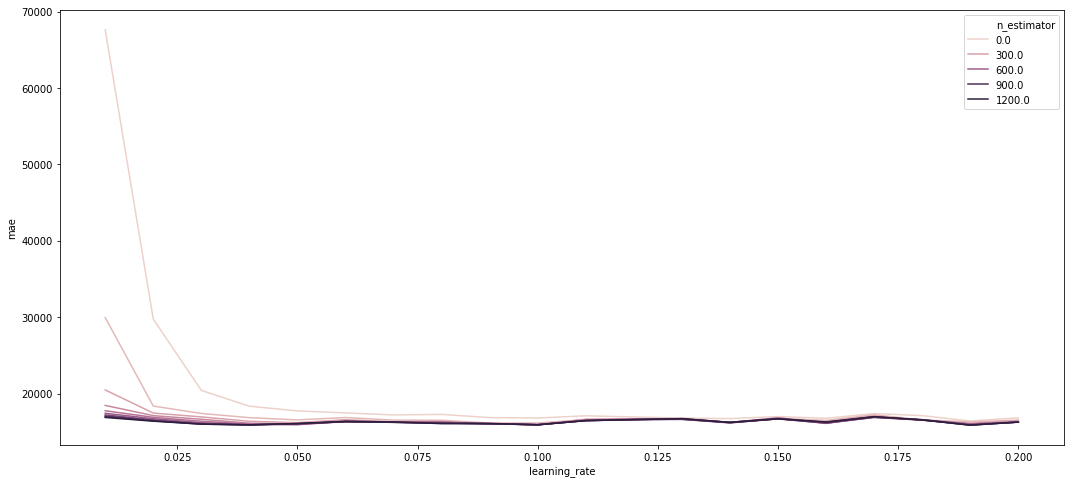

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(18, 8))
# plt.plot(x=results[['n_estimator', 'learning_rate']], y=results['mae'])
sns.lineplot(x=results['learning_rate'], y=results['mae'], hue=results['n_estimator'])
plt.show()

In [20]:
results2 = results.loc[60:]
results2.head()

,n_estimator,learning_rate,mae
60,400.0,0.01,18455.195473
61,400.0,0.02,17116.744007
62,400.0,0.03,16640.847670
63,400.0,0.04,16126.046674
64,400.0,0.05,16023.956055


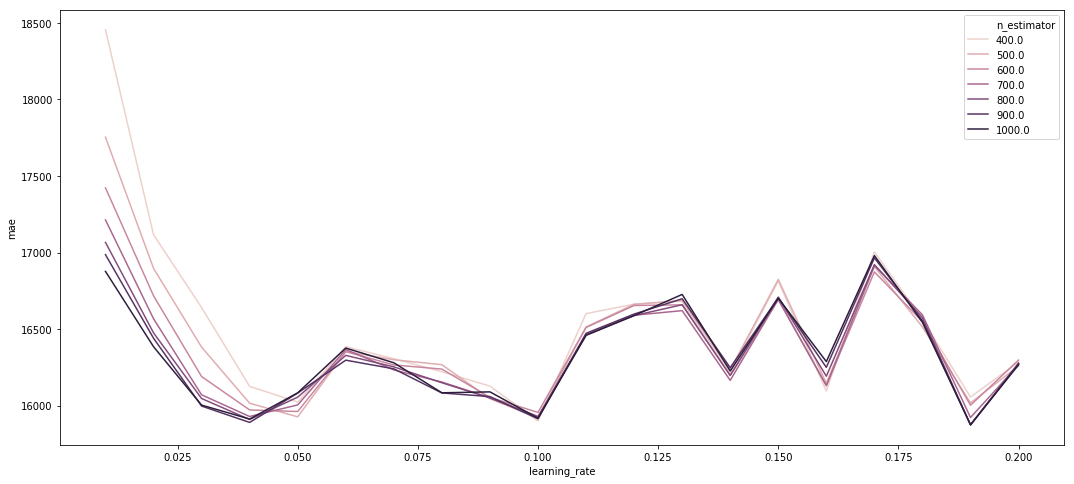

In [21]:
plt.figure(figsize=(18, 8))
# plt.plot(x=results[['n_estimator', 'learning_rate']], y=results['mae'])
sns.lineplot(x=results2['learning_rate'], y=results2['mae'], 
             hue=results2['n_estimator'], legend='full')
plt.show()

In [22]:
results2['mae'].min()

15873.136812392979

In [23]:
Best Results

SyntaxError: invalid syntax (<ipython-input-23-b66ff9be7b19>, line 1)

In [24]:
results2.loc[results2['mae'].idxmin()]

n_estimator        800.000000
learning_rate        0.190000
mae              15873.136812
Name: 158, dtype: float64

# Have a look at Grid Search at 

https://scikit-learn.org/stable/modules/grid_search.html

# Keep going

Continue to learn about **[data leakage](https://www.kaggle.com/alexisbcook/data-leakage)**.  This is an important issue for a data scientist to understand, and it has the potential to ruin your models in subtle and dangerous ways!

---
**[Intermediate Machine Learning Home Page](https://www.kaggle.com/learn/intermediate-machine-learning)**





*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum) to chat with other Learners.*